<a href="https://colab.research.google.com/github/curso23050/coderhouse/blob/main/proyecto_final_entrega33_M%C3%A1rquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Tercera entrega

#### Presentación de la empresa, organización o problema específico

##### La empresa es DATA AR: Una consultora que realiza análisis de Datos. Nuestro cliente en cuestión es una importante empresa de telecomunicaciones que se pone en contacto con nosotros para que realicemos un estudio del comportamiento de los usuarios que contratan su servicio y detectemos patrones capaz de predecir quienes podrian abandonar el servicio, asi de esa forma poder anticiparse mediante estrategias de retención.

#### Preguntas y objetivos de la investigación

##### El objetivo de la investigación es segmentar los usuarios que tienen mayor tendencia a abandonar el servicio. Para ello surgen las siguientes preguntas:
##### o	Existen patrones que nos permita predecir si el cliente va a dejar la compania? 
##### o	Es posible a partir de las conclusiones aplicar un plan de accion para reducir el churn?

#### Conformación del equipo de trabajo

###### o	Leandro Márquez – Data Science specialist 
###### o	Javier Gohlke – Data Science specialist
###### o	Federico Márquez – Data Science specialist
###### o	Guillermo Flores – Data Science specialist
###### o	Fransico Riveros – Data Science specialist

#### Fuente del dataset y criterios de selección (Data Acquisition).

##### Fuente: https://www.kaggle.com/blastchar/telco-customer-churn
##### Hemos seleccionado este Dataset ya que brinda mucho información sobre los usuarios, tiene una variable target clara, y no presenta valores nulos o faltantes, haciendo mas sencilla la tarea de Data Wrangling. En cuanto al contenido, presenta datos demográficos de los clientes, servicios contratados, facturacion y su condición de activo o abandono.

## 1 - EDA y  Data Wrangling

#### Partimos de un dataset en .csv descargado de su fuente en kaggle. Lo primero que hicimos fue realizar una lectura y comprensión de los datos

### 1.1 - Lectura del CSV e información global del dataset

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Forma del DF
df.shape

(7043, 21)

In [32]:
# Info (count, type, nulls) del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
# Valores únicos:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [34]:
# Columnas numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 1.2 - Historia de los datos

#### En base a la lectura de los datos y la investigación al respecto, somos capaces de describir que significa cada dato:
##### * customerID: ID del cliente
##### *  gender: Si el cliente es hombre o mujer
##### * SeniorCitizen: Si el cliente es adulto mayor o no (1, 0)
##### * Partner: Si el cliente tiene pareja o no (Sí, No)
##### * Dependents: Si el cliente tiene dependientes o no (Sí, No)
##### * tenure: Número de meses que el cliente ha permanecido en la empresa
##### * PhoneService: Si el cliente tiene servicio telefónico o no (Sí, No)
##### * MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, Sin servicio telefónico)
##### * InternetService: Proveedor de servicios de Internet del cliente (DSL, Fibra óptica, No)
##### * OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
##### * OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, Sin servicio de Internet)
##### * DeviceProtection: Si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de Internet)
##### * TechSupport: Si el cliente cuenta con soporte técnico o no (Sí, No, Sin servicio de internet)
##### * StreamingTV: Si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
##### * StreamingMovies: Si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)
##### * Contract: El plazo del contrato del cliente (Mes a mes, Un año, Dos años)
##### * PaperlessBilling: Si el cliente tiene facturación electrónica o no (Sí, No)
##### * PaymentMethod: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria (automática), Tarjeta de crédito (automática))
##### * MonthlyCharges: El monto cobrado al cliente mensualmente
##### * TotalCharges: El importe total cobrado al cliente.
##### * Churn: Si el cliente abandonó o no (Sí o No) VARIABLE TARGET

### 1.3 - Transformación de datos

##### En una primera instancia nos interesa limpiar la data y normalizar nombres y formatos para hacer mas claro el estudio de los datos

In [35]:
# Eliminación de registros con campos en blanco

df.replace(' ', np.nan, inplace=True)
df = df.dropna(how='any')
df.shape

(7032, 21)

In [36]:
# Renombramiento de campos para normalizar mayúsculas:
df = df.rename(columns={'customerID':'CustomerID',
                   'gender':'Gender',
                   'tenure':'Tenure'})

# Conversión de tipos de dato

### decimales a "float"
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### binarios a string (mejor claridad)
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.4 - Análisis univariado

##### Exhibimos los resultados de las variables númericas, dejando las categoricas para analizar de manera bivariada

#### Análisis univariado - Cobros mensuales

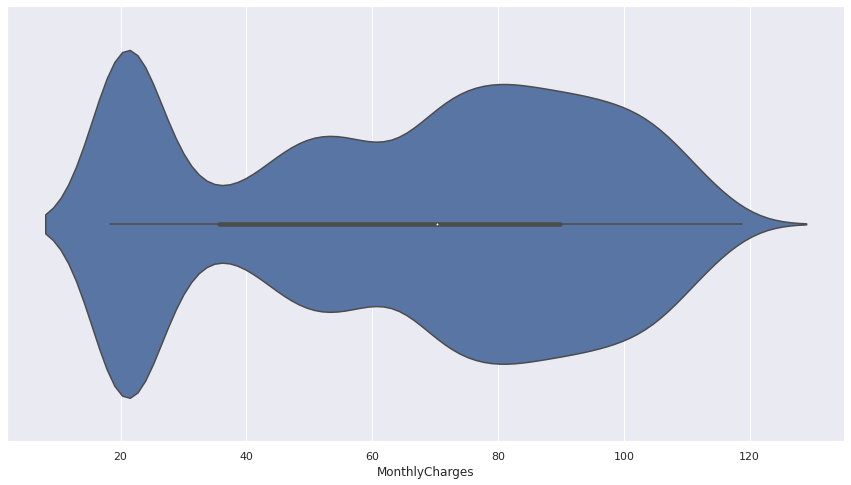

In [37]:
# Configuracion global de los graficos
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

# Grafico de violin (Permite observar la frecuencia y a su vez su distribucion)
sns.violinplot(x = df['MonthlyCharges'])

#### Análisis univariado - Permanencia en la compañia (tenure)

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Meses'),
 Text(0.5, 1.0, 'Tiempo de permanencia')]

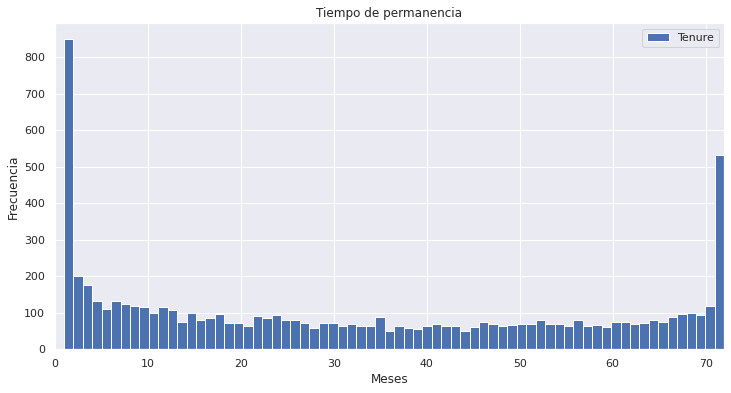

In [38]:
ax = df[['Tenure']].plot(kind = "hist", bins=70, figsize=(12, 6), xlim=[0, df.Tenure.max()])
ax.set(xlabel = "Meses", ylabel = "Frecuencia", title = "Tiempo de permanencia")

##### Encontramos aqui una distribución de tipo "bimodal", es decir, una fuerte frecuencia de clientes que han permanecido muy poco tiempo y a su vez otra fuerte inclinación hacia donde están los que han permanecido más tiempo. No sabemos a ciencia cierta si los valores en 0 corresponden a errores en el ingreso de datos o quizas a alguna promoción de servicio gratis por 1 mes. A su vez, creemos que el ultimo valor corresponderia a 70 meses o más.

### 1.5 - Análisis bivariado

##### Analizamos como se comportan las variables entre si y respecto de la variable target para intentar encontrar relaciones o patrones.

#### Analisis bivariado - Metodo de pago VS abandono

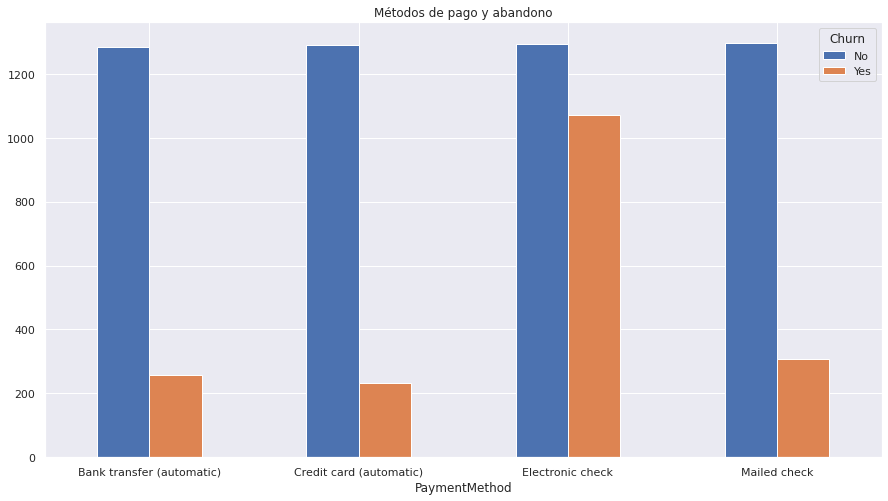

In [39]:
df_payment = df.groupby(['PaymentMethod','Churn']).size()
df_payment = df_payment.unstack()
df_payment.plot(kind='bar', rot='0', title = "Métodos de pago y abandono")

#### Analisis bivariado - Metodo de pago VS Pago mensual VS abandono 

[Text(0, 0.5, 'Abono mensual'),
 Text(0.5, 0, 'Metodos de pago'),
 Text(0.5, 1.0, 'Densidad de pagos segun metodo de pago')]

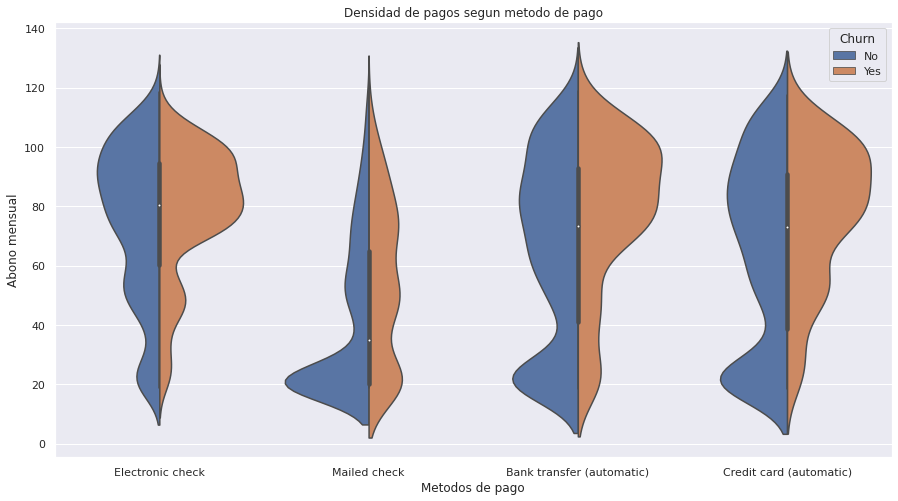

In [40]:
ax = sns.violinplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = df, hue = 'Churn', split = True)
ax.set(xlabel = "Metodos de pago", ylabel = "Abono mensual", title = "Densidad de pagos segun metodo de pago")

##### Se concluye que los abandonos se concentran en zonas de cobros altos y aun mas pronunciadamente en medio de pago con cheque electrónico

#### Analisis bivariado -  Cobros mensuales vs Tiempo de permanencia vs Abandono

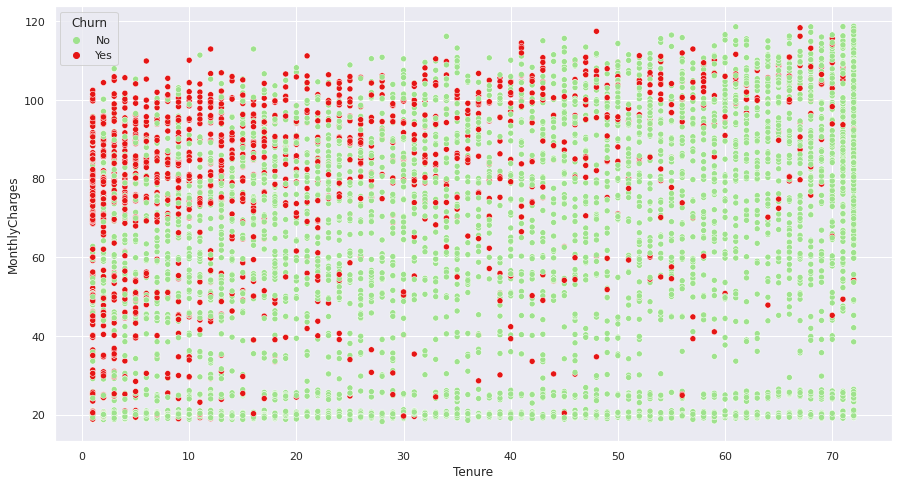

In [41]:
sns.scatterplot(data=df, x="Tenure", y="MonthlyCharges", hue="Churn", palette=['#9FE28D','#E51515'])

##### Se observa con apreciable tendencia que los usuarios que abandonan suelen tener cobros grandes.. Además se aprecia mucha concentración en los primeros meses de permanencia, lo cual sugiere que precios altos en los primeros meses auyentan a los clientes.

#### Analisis bivariado - Contrato VS Tiempo de permanencia

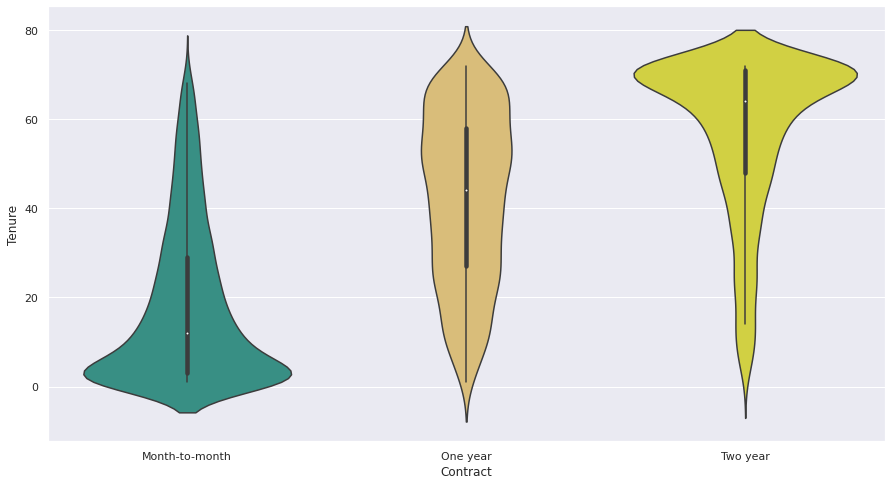

In [42]:
ax = sns.violinplot (x = 'Contract', y = 'Tenure', data = df, palette=['#2a9d8f','#e9c46a','#e8e72c'])

#### Analisis bivariado -  Contrato VS abandono

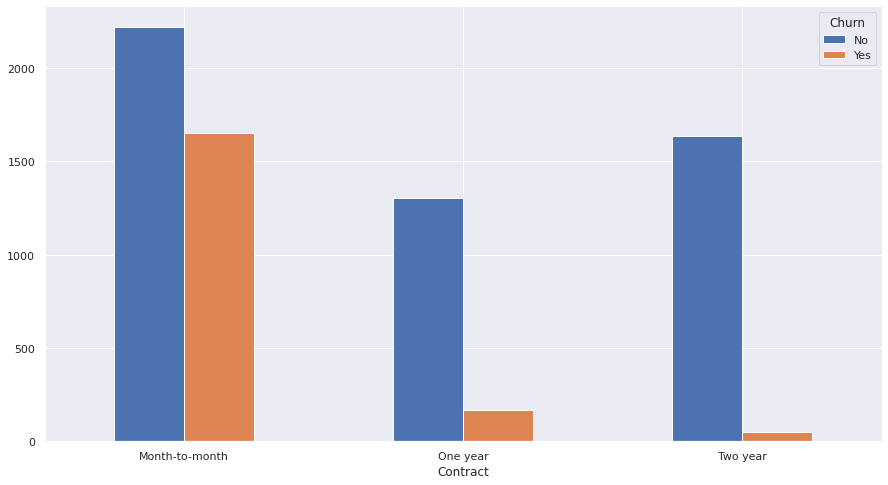

In [43]:
# Afectando por el tipo de abandono
df_contract = df.groupby(['Contract','Churn']).size()
df_contract = df_contract.unstack()
df_contract.plot(kind='bar', rot='0')

#### Analisis bivariado -  Contrato VS permanencia VS abandono

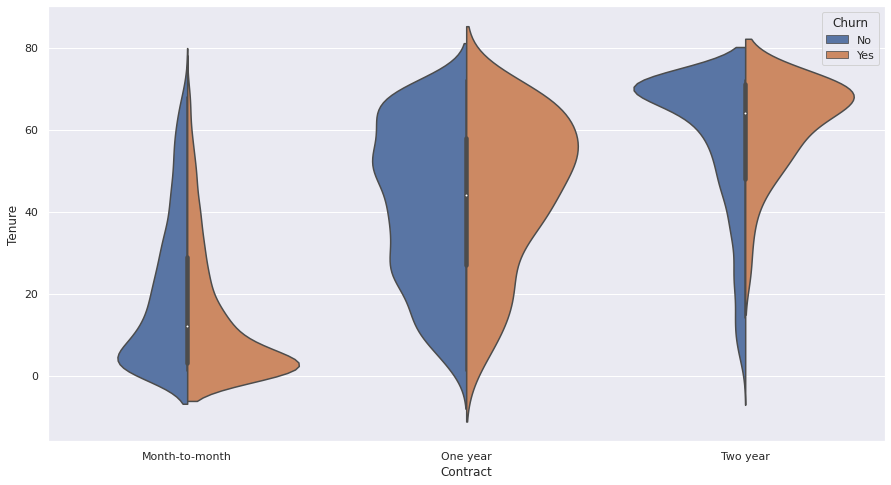

In [44]:
ax = sns.violinplot(x = 'Contract', y = 'Tenure', data = df, hue = "Churn", split = True)

##### De estos ultimos 3 graficos se puede determinar que cuanto mayor sea el plazo del contrato, mayor permanencia tendrá y por lo tanto menor probabilidad de abandono

#### Analisis bivariado -  Contrato VS abandono

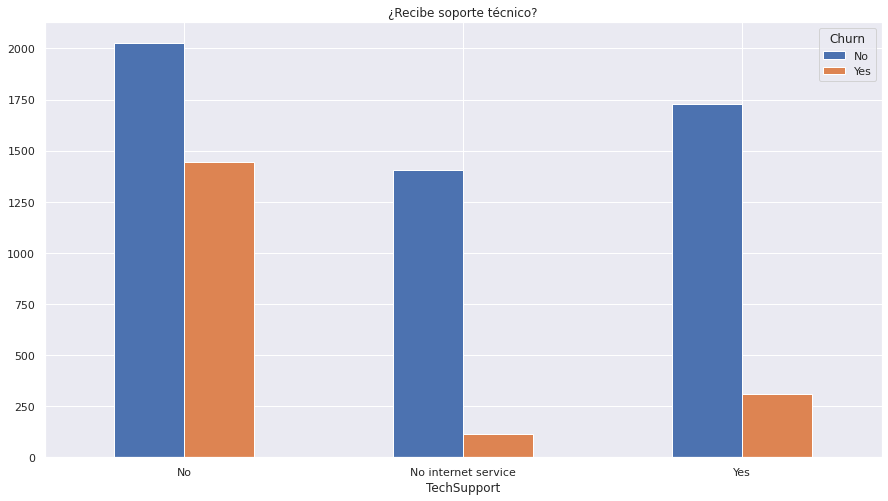

In [45]:
df_support = df.groupby(['TechSupport','Churn']).size()
df_support = df_support.unstack()
df_support.plot(kind='bar', rot='0', title="¿Recibe soporte técnico?")

##### Queda en evidencia que aquellos usuarios que tienen servicio de internet y no reciben soporte, tienen tendencia a abandonar la compañia

#### Analisis bivariado -  Soporte Tecnico VS abandono

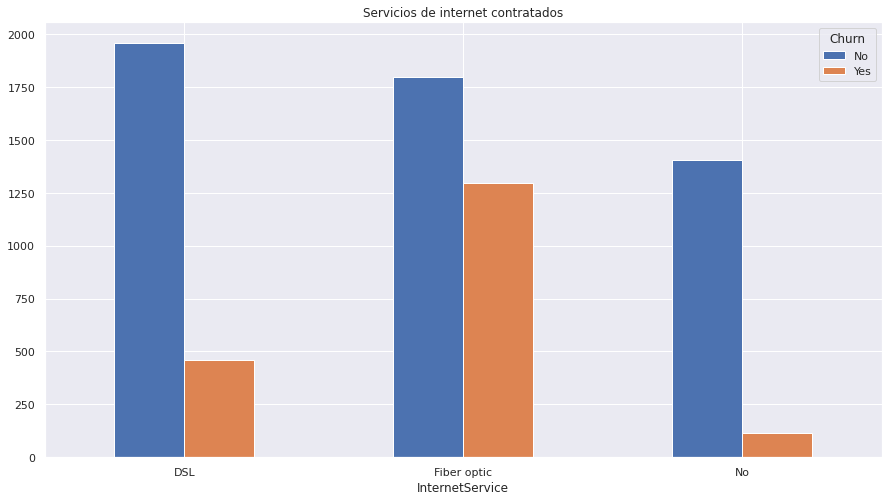

In [46]:
df_internet = df.groupby(['InternetService','Churn']).size()
df_internet = df_internet.unstack()
df_internet.plot(kind='bar', rot='0', title="Servicios de internet contratados")

##### Se aprecia que el servicio de fibra óptica está vinculado a mayores abandonos que DSL, siendo ese servicio el punto débil en cuanto a deserción de usuarios

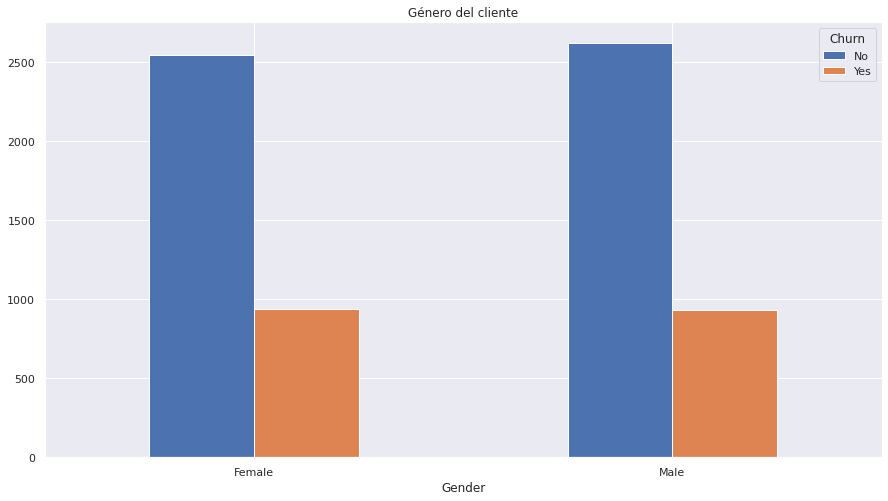

In [47]:
df_gender = df.groupby(['Gender','Churn']).size()
df_gender = df_gender.unstack()
df_gender.plot(kind='bar', rot='0', title="Género del cliente")

##### Se observa que no hay distinción en cuanto al abandono, por lo tanto esta variable puede descartarse

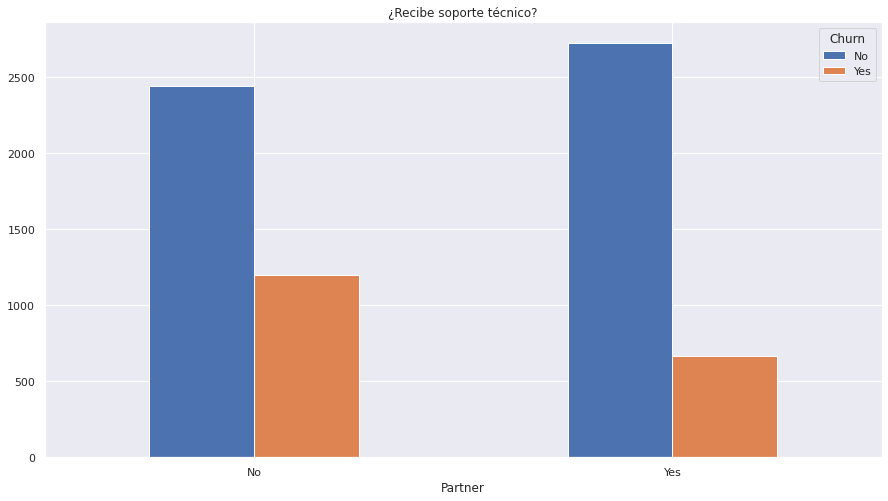

In [48]:
df_partner = df.groupby(['Partner','Churn']).size()
df_partner = df_partner.unstack()
df_partner.plot(kind='bar', rot='0', title="¿Recibe soporte técnico?")

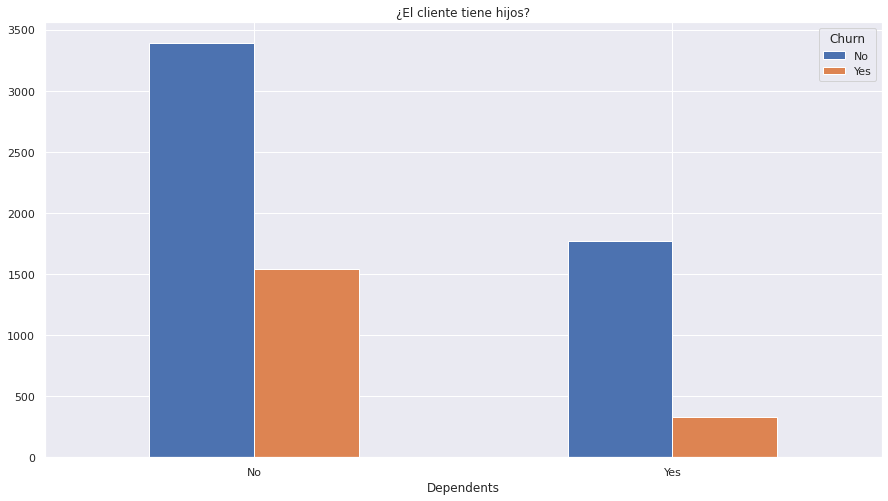

In [49]:
df_dependents = df.groupby(['Dependents','Churn']).size()
df_dependents = df_dependents.unstack()
df_dependents.plot(kind='bar', rot='0', title="¿El cliente tiene hijos?")

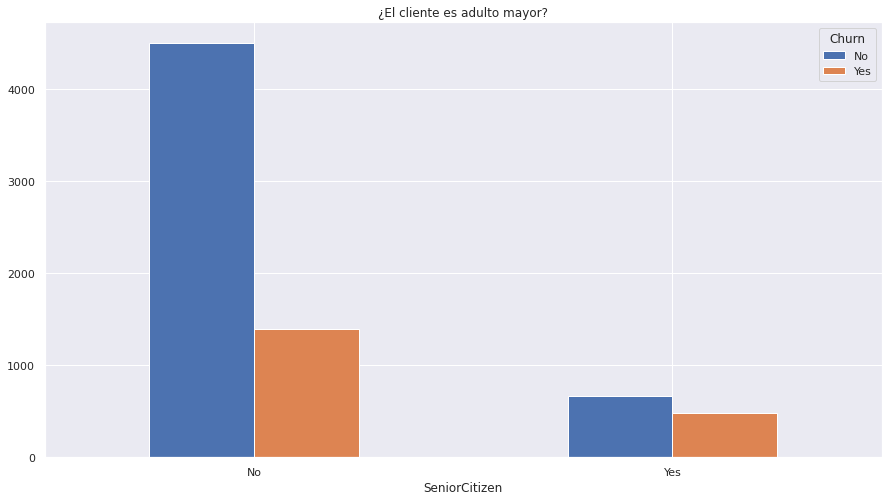

In [50]:
df_citizen = df.groupby(['SeniorCitizen','Churn']).size()
df_citizen = df_citizen.unstack()
df_citizen.plot(kind='bar', rot='0', title="¿El cliente es adulto mayor?")

###### Se puede notar que los adultos mayores son mas propensos a abandonar el servicio

### 1.6 - 2° Transformación de datos

##### A partir de aquí transformamos convenientemente las variables categóricas a numéricas, lo cual nos será util tanto para crear un mapa de calor a continuación y comprobar correlaciones, como para los algoritmos de Machine Learning en un paso posterior. Además, aprovechamos para eliminar las variables que no interesan o no tienen efecto en el abandono.

In [51]:
# Eliminamos las variables que no nos interesa considerar
df = df.drop(columns = ["CustomerID","Gender"])

# Como el algoritmo no admite variables categóricas, convertimos las mismas en variables numéricas binarias
df.SeniorCitizen = df.SeniorCitizen.replace({'No':0, 'Yes':1})
df.Partner = df.Partner.replace({'No':0, 'Yes':1})
df.Dependents = df.Dependents.replace({'No':0, 'Yes':1})
df.PhoneService = df.PhoneService.replace({'No':0, 'Yes':1, 'No phone service': 2})
df.MultipleLines = df.MultipleLines.replace({'No':0, 'Yes':1, 'No phone service': 2})
df.InternetService = df.InternetService.replace({'DSL':0, 'Fiber optic':1, 'No': 2})
df.OnlineSecurity = df.OnlineSecurity.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.OnlineBackup = df.OnlineBackup.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.DeviceProtection = df.DeviceProtection.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.TechSupport = df.TechSupport.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.StreamingTV = df.StreamingTV.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.StreamingMovies = df.StreamingMovies.replace({'No':0, 'Yes':1, 'No internet service': 2})
df.Contract = df.Contract.replace({'Month-to-month':0, 'One year':1, 'Two year':2})
df.PaperlessBilling = df.PaperlessBilling.replace({'No':0, 'Yes':1})
df.PaymentMethod = df.PaymentMethod.replace({'Electronic check':0, 'Mailed check':1, 
                                                     'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
df.Churn = df.Churn.replace({'No':0, 'Yes':1})
df


,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


### 1.7 - Analisis multivariado

#### Analisis multivariado - Búsqueda de correlaciones con mapa de calor

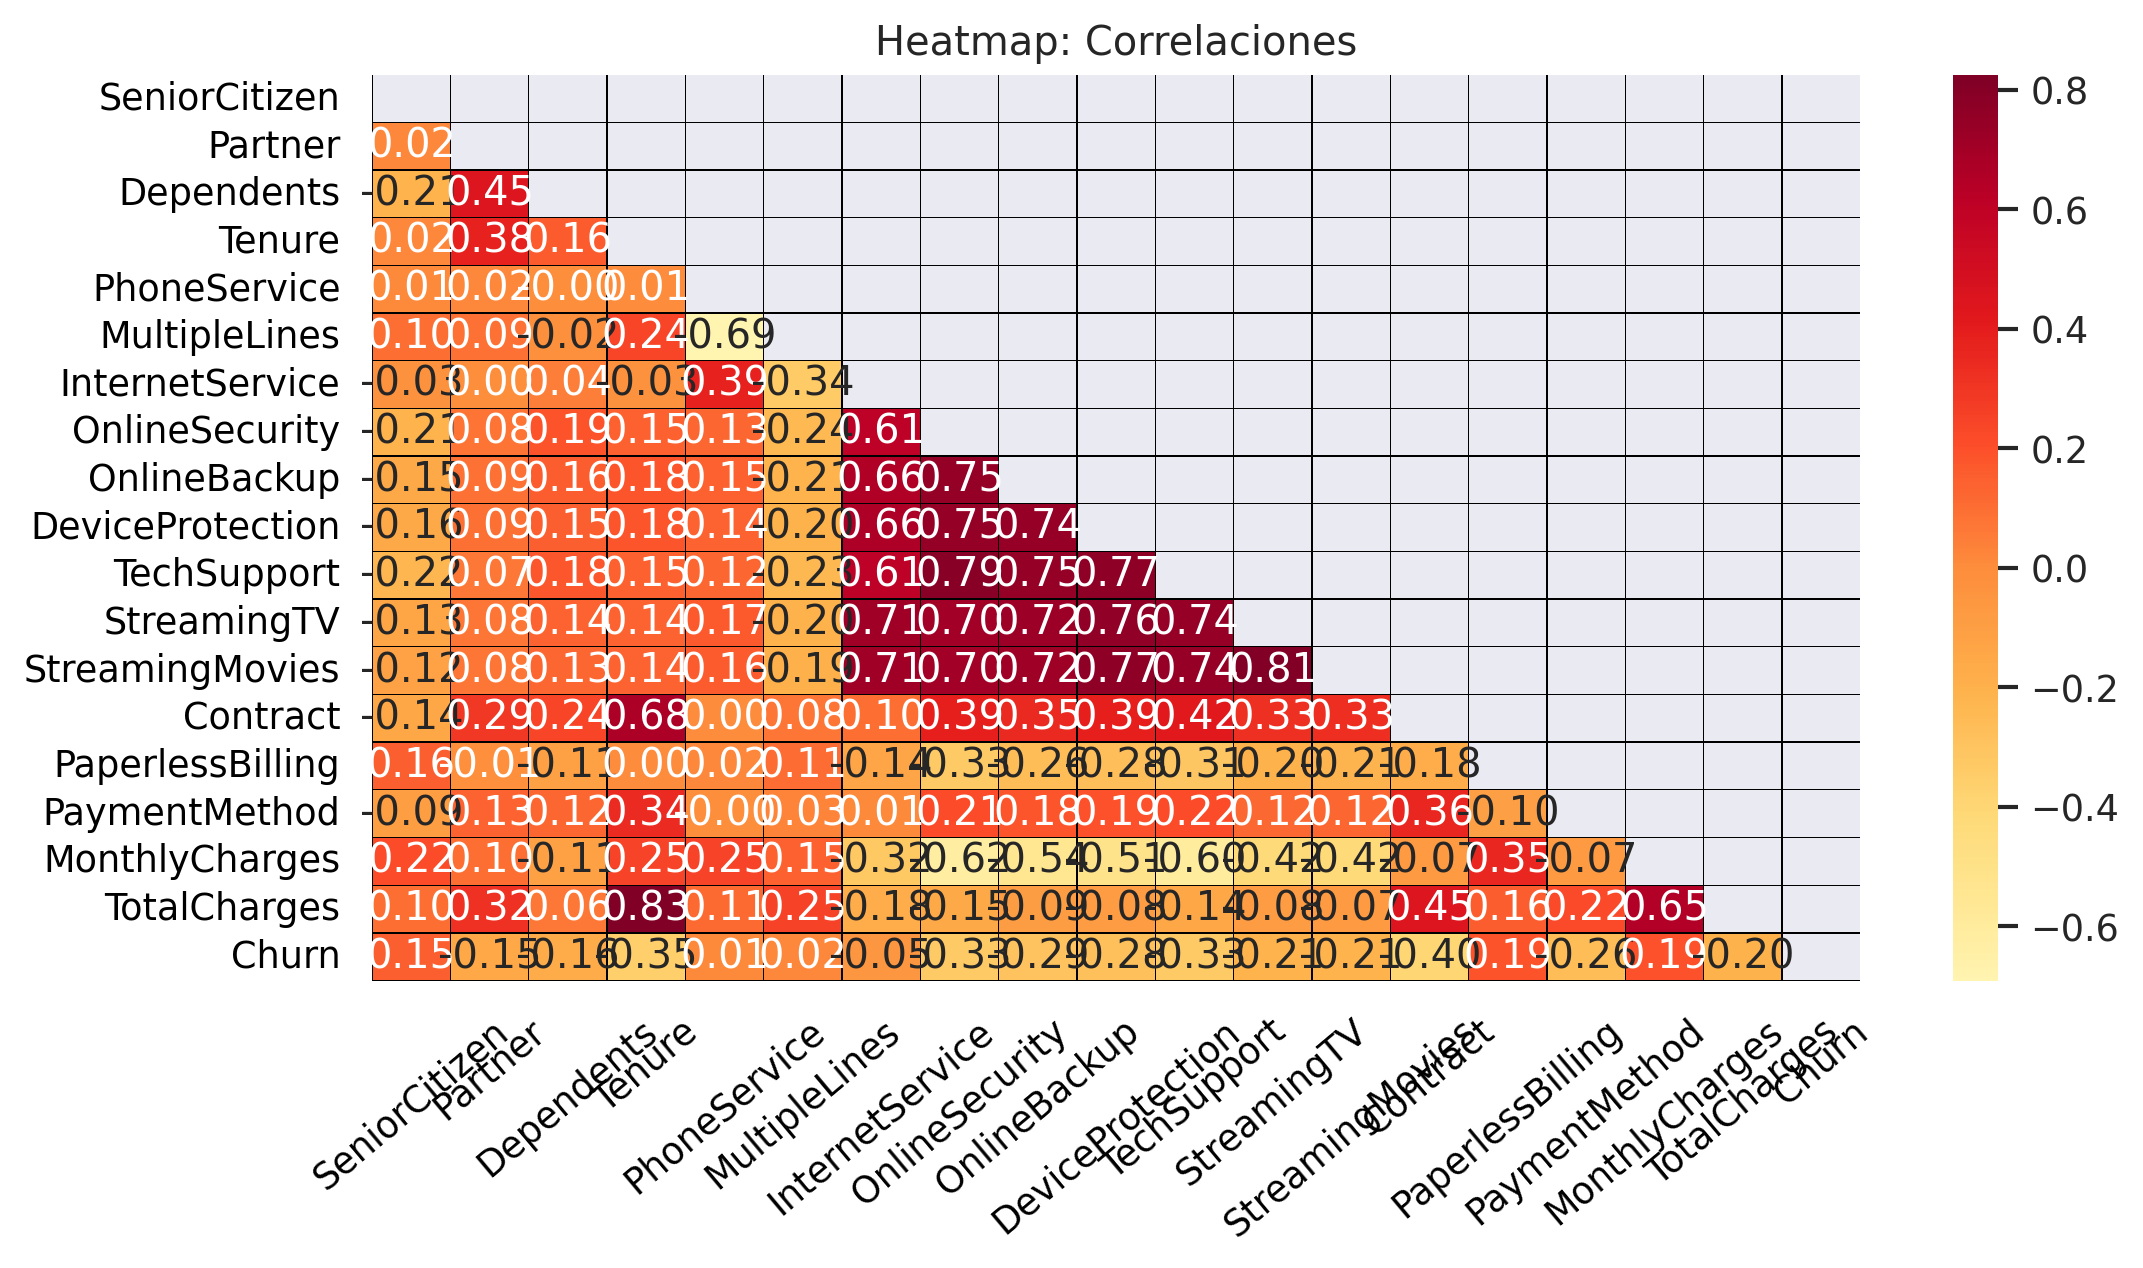

In [52]:
plt.figure ( dpi = 240, figsize = (10,5))

mask = np.triu(np.ones_like(df.corr(),dtype = bool))

sns.heatmap(df.corr(), mask = mask, center=0, fmt = ".2f",annot=True, linewidth=0.1, linecolor='black', cmap = 'YlOrRd')
plt.yticks(rotation = 0, color='black')
plt.xticks(rotation = 40, color='black')
plt.title('Heatmap: Correlaciones')
plt.show()

##### Se observan fuertes correlaciones entre algunos servicios, por lo cual se supone que deben soler venir en conjunto, sin embargo ningun valor es tan alto como para descartar variables. Por otro lado, se visualiza una fuerte correlación entre la cantidad de meses que ha permanecido el cliente y el monto total que lleva pagando, lo cual es coherente. De igual manera se interpretan la cantidad de meses y los cargos mensuales por uso del servicio. Nos planteamos aqui la posibilidad de eliminar entonces la variable TotalCharges. Para estar seguros deberiamos ver si existe un sesgo entre abandonos.

#### Analisis multivariado - Cobro total respecto al tiempo de permanencia, segun target

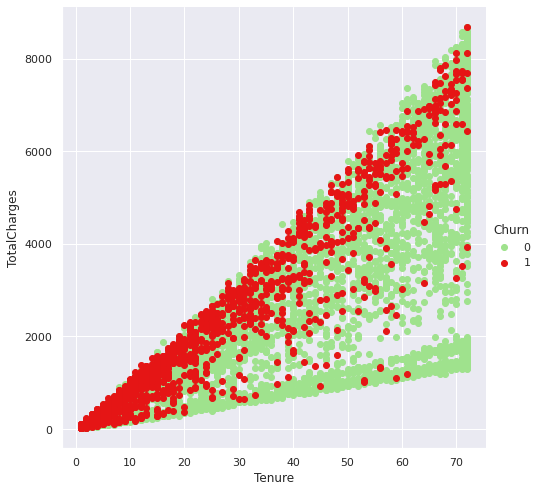

In [53]:
sns.FacetGrid(df,hue = 'Churn' , height = 7, palette=['#9FE28D','#E51515']).map(plt.scatter,'Tenure','TotalCharges').add_legend()
plt.show()

##### Es posible notar que para aquellos usuarios que abandonaron el servicio, la pendiente de crecimiento es mayor y está casi concentrada, mientras que aquellos que siguen manejan un amplio espectro de dispersión. A pesar de brindar este indicador, no está dando información relevante, ya que obtuvimos similar conclusion analizando los montos mensuales, por lo tanto se puede descartar la variable "Total Charges"  y reducir asi la dimensionalidad.

## 2 - Algoritmos de clasificación (Aprendizaje supervisado)

### 2.1 - Arbol de decisión

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generamos el modelo
tree = DecisionTreeClassifier(random_state=10, max_depth = 3)

# Separamos en X y Y
X = df.drop("Churn", axis = 1)
y = df.Churn

# Separamos el conjunto en entrenamiento y prueba/validación (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Entrenamos el modelo
tree.fit(X_train, y_train)

# Realizamos la predicción sobre los conjuntos
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calculamos la precisión de las predicciones:
train_acc = accuracy_score(y_train, y_train_pred) 
print(f"El porcentaje de aciertos sobre el set de entrenamiento es de: {round(train_acc * 100, 2)} %")
test_acc = accuracy_score(y_test, y_test_pred) 
print(f"El porcentaje de aciertos sobre el set de evaluación es de: {round(test_acc * 100, 2)} %")

El porcentaje de aciertos sobre el set de entrenamiento es de: 78.34 %
El porcentaje de aciertos sobre el set de evaluación es de: 77.25 %


#### Grafico

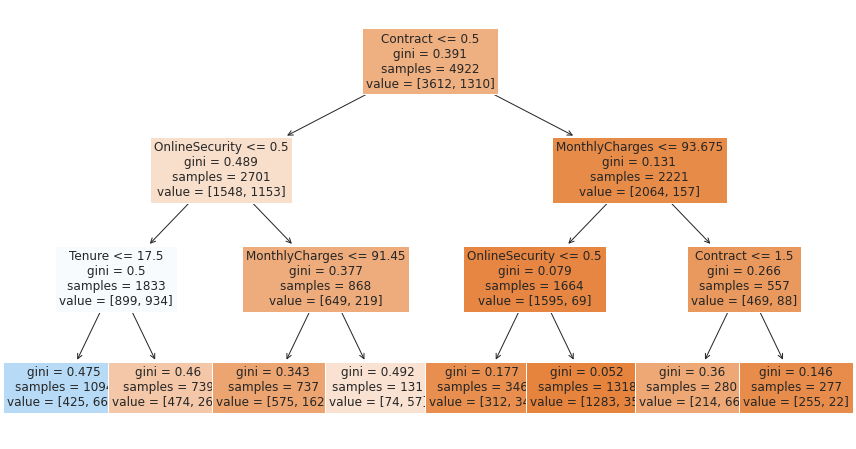

In [55]:
from sklearn.tree import plot_tree

# Ploteo.
plot_tree (decision_tree = tree, 
           feature_names = 
           X.columns, 
           filled = True, 
           fontsize = 12);

### 2.3 - K Near neighbors (KNN)

##### Tenemos un n = 7000 y 3 variables numéricas. Usaremos un valor inicial de k=10 y relaciones entre el Tiempo de permanencia y el Costo mensual del servicio 

#### Grafico

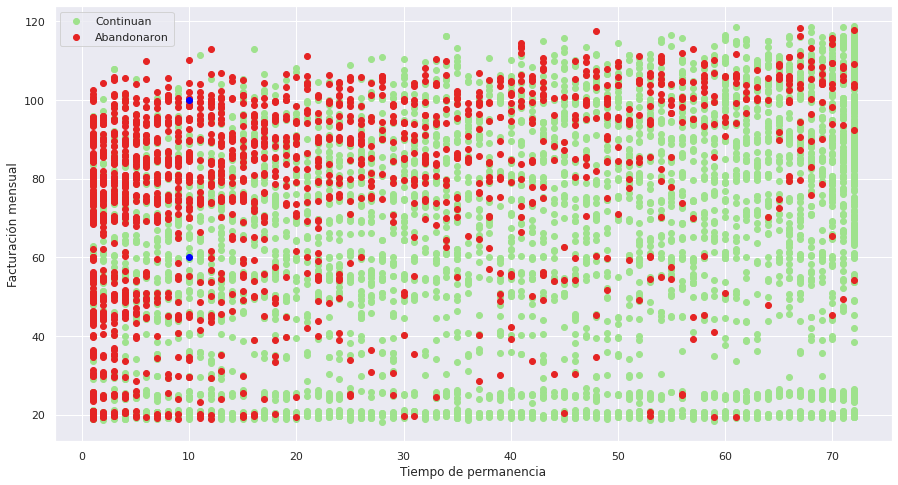

In [56]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})

punto_nuevo_1 = pd.DataFrame({'Tenure':[10], 'MonthlyCharges':[100]})
punto_nuevo_2 = pd.DataFrame({'Tenure':[10], 'MonthlyCharges':[60]})

ax = plt.axes()

ax.scatter(df.loc[df['Churn'] == 0, "Tenure"],
           df.loc[df['Churn'] == 0, "MonthlyCharges"],
           c = '#9FE28D',
           label = 'Continuan')
ax.scatter(df.loc[df['Churn'] == 1, "Tenure"],
           df.loc[df['Churn'] == 1, "MonthlyCharges"],
           c = '#E52424',
           label = 'Abandonaron')
ax.scatter(punto_nuevo_1["Tenure"],
           punto_nuevo_1["MonthlyCharges"],
           c = 'blue')
ax.scatter(punto_nuevo_2["Tenure"],
           punto_nuevo_2["MonthlyCharges"],
           c = 'blue')

plt.xlabel("Tiempo de permanencia")
plt.ylabel("Facturación mensual")
ax.legend()
plt.show()

#### Creación del modelo y predicciones unitarias

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# Generamos el modelo
knn = KNeighborsClassifier(n_neighbors = 10)

X = df[['Tenure', 'MonthlyCharges']]
Y = df['Churn']

# Entrenamos al modelo
knn.fit(X, Y)

# Realizamos la predicción
prediccion_knn_1 = knn.predict(punto_nuevo_1)
prediccion_knn_1_prob = knn.predict_proba(punto_nuevo_1)
prediccion_knn_2 = knn.predict(punto_nuevo_2)
prediccion_knn_2_prob = knn.predict_proba(punto_nuevo_2)

# Resultados
print(f"Predicción de abandono del punto 1: {prediccion_knn_1} con una probabilidad del {prediccion_knn_1_prob[0][0]*100} %")
print(f"Predicción de abandono del punto 2: {prediccion_knn_2} con una probabilidad del {prediccion_knn_2_prob[0][0]*100} %")

Predicción de abandono del punto 1: [1] con una probabilidad del 20.0 %
Predicción de abandono del punto 2: [0] con una probabilidad del 100.0 %


#### Predicción del conjunto de prueba

In [58]:
# Generamos el modelo
knn = KNeighborsClassifier(n_neighbors = 10)

X = df[['Tenure', 'MonthlyCharges']]
Y = df['Churn']

# Separamos el conjunto en entrenamiento y prueba/validación (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Entrenamos el modelo
knn.fit(X_train, y_train)

# Realizamos la predicción sobre el conjunto de prueba
y_test_pred = knn.predict(X_test)

# Calculamos la precisión de las predicciones:
test_acc_knn = accuracy_score(y_test, y_test_pred) 
print(f"Porcentaje de aciertos con K near neighbors es de: {round(test_acc_knn * 100, 2)} %")

Porcentaje de aciertos con K near neighbors es de: 77.91 %


#### Optimizacion del accuracy con seleccion de K

##### Utilizamos el metodo del codo para alcanzar un k optimo

Text(0, 0.5, 'Tasa de Error')

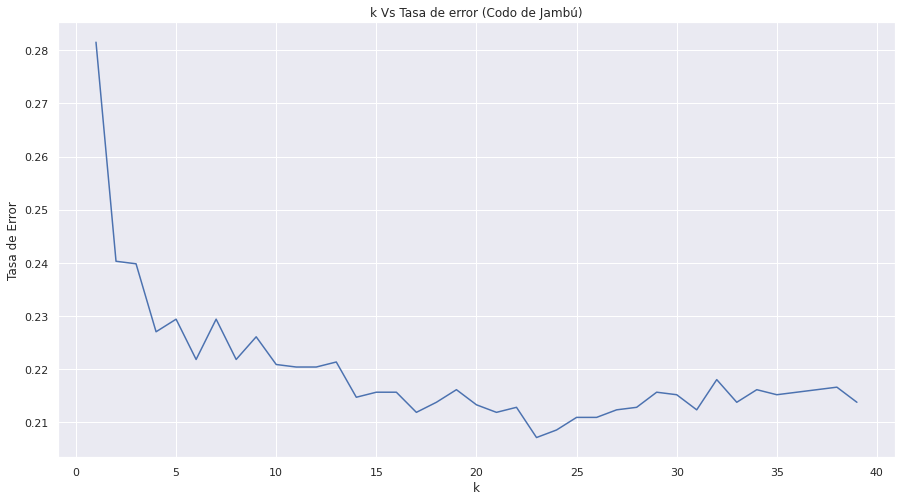

In [59]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,40), error_rate)

plt.title('k Vs Tasa de error (Codo de Jambú)')
plt.xlabel('k')
plt.ylabel('Tasa de Error')

##### Se puede observar que el K óptimo se daría para k=23

#### Nueva predicción con k óptimo

In [60]:
# Generamos el modelo
knn_opt = KNeighborsClassifier(n_neighbors = 23)

# Separamos el conjunto en entrenamiento y prueba/validación (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Entrenamos el modelo
knn_opt.fit(X_train, y_train)

# Realizamos la predicción sobre el conjunto de prueba
y_test_pred_opt = knn_opt.predict(X_test)

# Calculamos la precisión de las predicciones:
test_acc_knn_opt = accuracy_score(y_test, y_test_pred_opt) 
print(f"Porcentaje de aciertos con KNN con n=10 es de: {round(test_acc_knn * 100, 2)} %")
print(f"Porcentaje de aciertos con KNN con n=23 (óptimo) es de: {round(test_acc_knn_opt * 100, 2)} %")

Porcentaje de aciertos con KNN con n=10 es de: 77.91 %
Porcentaje de aciertos con KNN con n=23 (óptimo) es de: 79.29 %


### 2.4 - Regresión logística

##### Como queremos obtener una salida discreta utilizaremos la regresión logística. Tomaremos la relación entre el tiempo de permanencia y el Costo mensual del servicio 

#### Gráfico de puntos

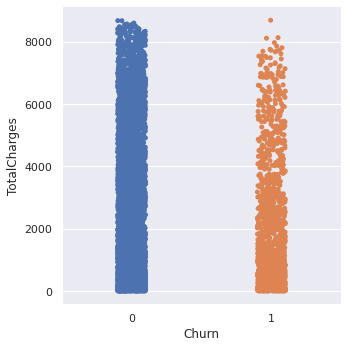

In [61]:
sns.catplot(y="TotalCharges", x="Churn", data=df)

#### Creación del modelo y predicciones

In [62]:
from sklearn.linear_model import LogisticRegression

# Instancia de regresión logistica:
reglog = LogisticRegression()

X = df[['TotalCharges']].values
y = df['Churn'].values

# Entrenamiento de la regresión:
reglog.fit(X, y)

# Paso valores nuevos a predecir, como una matriz
X_nuevo = np.array([50, 500, 2000, 4000, 6000, 8000, 9000]).reshape(-1,1)

# Predicción:
prediccion = reglog.predict(X_nuevo)
prediccion_prob = reglog.predict_proba(X_nuevo)

print("Para valores: \n", X_nuevo)
print("Las predicciones son: \n", prediccion.reshape(-1,1))
print("Con probabilidades de: \n",prediccion_prob.round(2) * 100)
print(f"Predicción de abandono con Facturación acumulada de {X_nuevo[2]}: {prediccion[0]}, \
con una probabilidad del {round(prediccion_prob[0][0]*100, 2)} %")

Para valores: 
 [[  50]
 [ 500]
 [2000]
 [4000]
 [6000]
 [8000]
 [9000]]
Las predicciones son: 
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Con probabilidades de: 
 [[64. 36.]
 [66. 34.]
 [73. 27.]
 [82. 18.]
 [88. 12.]
 [92.  8.]
 [94.  6.]]
Predicción de abandono con Facturación acumulada de [2000]: 0, con una probabilidad del 63.57 %


##### Viendo el gráfico y tambien los resultados, observamos que el modelo de regresión logístico no arroja buenos resultados predictivos. Tan solo puede predecir con cierta exactitud cuando hablamos de valores de facturación total acumulada muy grandes (clientes con mucha antigüedad), por lo tanto se descarta.

### 2.5 - SVM (Support vector machines)

#### Creación del modelo y predicciones

In [92]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Separamos el conjunto en entrenamiento y prueba/validación (70%-30%)
X = df[['Tenure', 'MonthlyCharges']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Generamos los modelos (utilizando las 4 funciones)
linear = svm.SVC(kernel = 'linear', C = 1, decision_function_shape = 'ovo', probability=True)
rbf = svm.SVC(kernel = 'rbf', gamma = 1, C = 1, decision_function_shape = 'ovo', probability=True)
poly = svm.SVC(kernel = 'poly', degree = 3, C = 1, decision_function_shape = 'ovo', probability=True)
sig = svm.SVC(kernel = 'sigmoid', C = 1, decision_function_shape = 'ovo', probability=True)

# Entrenamos los modelos
linear.fit(X_train, y_train)
rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)
sig.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', kernel='sigmoid', probability=True)

#### Gráfico de visualización de los 4 kernels

In [95]:


h = .02  # step size in the mesh
C = 1.0  # SVM regularization parameter

X2 = X.to_numpy()
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['Linear kernel', 'RBF kernel', 'Polynomial kernel', 'Sigmoid kernel']

for i, clf in enumerate((linear, rbf, poly, sig)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X2[:, 0], X2[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Tiempo de permanencia')
    plt.ylabel('Costo mensual')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

'''

SyntaxError: ignored

#### Predicciones y resultados

In [65]:
# Realizamos la predicción
linear_pred = linear.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_pred = poly.predict(X_test)
sig_pred = sig.predict(X_test)

# Resultados
linear_acc = linear.score(X_test, y_test)
rbf_acc = rbf.score(X_test, y_test)
poly_acc = poly.score(X_test, y_test)
sig_acc = sig.score(X_test, y_test)

# Resultados
print(f"precisión con kernel linear: {round(linear_acc * 100, 2)} %")
print(f"precisión con kernel polynomial: {round(rbf_acc * 100, 2)} %")
print(f"precisión con kernel Radial Basis: {round(poly_acc * 100, 2)} %")
print(f"precisión con kernel Sigmoid: {round(sig_acc * 100, 2)} %")

precisión con kernel linear: 78.77 %
precisión con kernel polynomial: 77.01 %
precisión con kernel Radial Basis: 79.48 %
precisión con kernel Sigmoid: 62.18 %


##### Observamos que salvo el kernel de sigmoide, el resto comparten un accuracy parecido. A fines de simplificar, seguiremos trabajando solo con el kernel de radial basis, aunque realmente habria que testearlo mas a fondo para determinar cual es mejor de los 4.

### 2.6  - Optimización de modelos por métodos de ensamble

###### Para mejorar el rendimiento de los modelos, probaremos incluir algoritmos de Bagging y Boosting

#### 2.6.1 - Bagging: Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Generamos el modelo
rf = RandomForestClassifier(random_state = 10, n_estimators = 200, 
                               class_weight = "balanced", max_features = "log2")

# Separamos el conjunto en entrenamiento y prueba/validación (70%-30%)
X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Entrenamos el modelo
rf.fit(X_train, y_train)

# Realizamos la predicción sobre el conjunto de prueba
y_test_pred_rf = rf.predict(X_test)

# Calculamos la precisión de las predicciones:
print(f"Porcentaje de aciertos con Decision Tree era de: {round(test_acc * 100, 2)} %")
test_acc_rf = accuracy_score(y_test, y_test_pred_rf) 
print(f"Porcentaje de aciertos con Random Forest es de: {round(test_acc_rf * 100, 2)} %")

Porcentaje de aciertos con Decision Tree era de: 77.25 %
Porcentaje de aciertos con Random Forest es de: 79.57 %


##### La mejora respecto al decision tree es sustancial

#### 2.6.2 - AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier

# Defino X e Y como vectores de numpy
X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Entrenamos el modelo
ada_model = ada.fit(X_train, y_train)

# Predicción
y_pred = ada_model.predict(X_test)
print(f"Accuracy utilizando algoritmo AdaBoost: {round(accuracy_score(y_test, y_pred) * 100, 2)} %")

Accuracy utilizando algoritmo AdaBoost: 79.95 %


#### 2.6.3 - Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Creamos un GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 10)

# Entrenamos el modelo
gbrt_model = gbrt.fit(X_train, y_train)

# Predicción
y_pred = gbrt_model.predict(X_test)
print(f"Accuracy utilizando algoritmo Gradient Boosting: {round(accuracy_score(y_test, y_pred) * 100, 2)} %")

Accuracy utilizando algoritmo Gradient Boosting: 80.14 %


#### 2.6.4 - XG Boosting

In [69]:
import xgboost as xgb

# Instanciamos el modelo
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=10)

# Entrenamos el modelo
xgb_model = clf_xgb.fit(X_train,y_train) 

# Predicciones de train y test
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy utilizando algoritmo XGBoosting train: {round(train_accuracy * 100, 2)} %")
print(f"Accuracy utilizando algoritmo XGBoosting test: {round(test_accuracy * 100, 2)} %")

Accuracy utilizando algoritmo XGBoosting train: 79.91 %
Accuracy utilizando algoritmo XGBoosting test: 77.91 %


#### 2.6.5 - Light GBM

In [70]:
import lightgbm as lgbm

# Instanciamos el modelo
clf_lgbm = lgbm.LGBMClassifier()

# Entrenamos el modelo
lgbm_model = clf_lgbm.fit(X_train, y_train)

# Predicciones
y_pred=lgbm_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy utilizando algoritmo Light GBM: {round(test_accuracy * 100, 2)} %")

Accuracy utilizando algoritmo Light GBM: 78.48 %


##### Los resultados de estos metodos han sido mejoradores. A fines de simplificar y no trabajar con tantos modelos, seguiremos solo con Random Forest y XG Boosting

### 2.7 - Optimización de modelos con PCA

##### Para KNN y SVM hemos utilizado solo 2 variables numéricas, mientras que para Decision Tree y sus algoritmos de ensamble (Random forest y los metodos de boosting) hemos utilizado todas, es decir, 18. Para este último caso creemos que la extensa dimensionalidad puede jugar en contra debido a la "maldición de la dimensionalidad". Evaluaremos una mejora con el método de Principal component analysis.

#### 2.7.1 - Búsqueda de los PCA

Text(0, 0.5, 'Varianza acumulada')

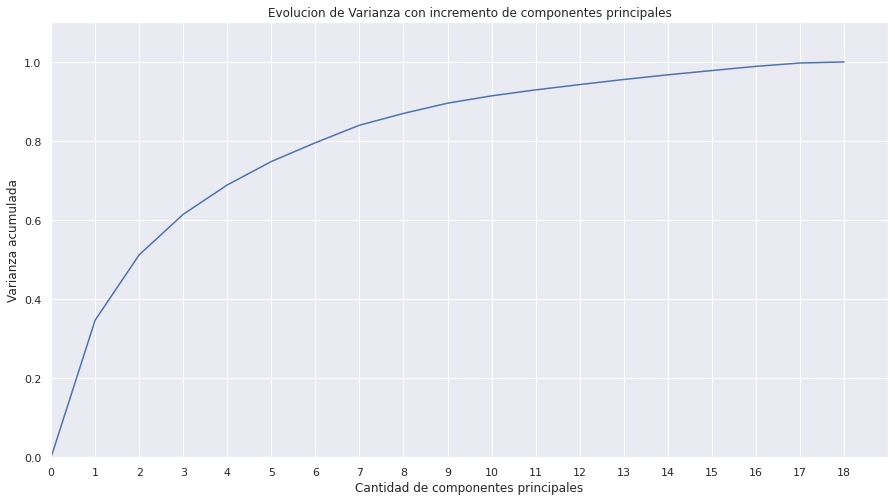

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preprocesamiento
X = df.drop("Churn", axis = 1)
y = df.Churn

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Normalizamos los datos para que PCA funcione mejor!
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Aplicacion de PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# Selección de cantidad de componentes por metodo grafico
accumulated_variance = 0
points = [{"n_comp":0, "acc_variance":0}]
for component,variance in enumerate(explained_variance):
    accumulated_variance += variance
    point = {"n_comp":component+1, "acc_variance": accumulated_variance}
    points.append(point)

df_pca = pd.DataFrame(points)
ax = sns.lineplot(data=df_pca, x="n_comp", y="acc_variance")
ax.set_xticks(range(0, len(points)))
ax.set(xlim=(0, len(points)), ylim=(0,1.1))
ax.set_title("Evolucion de Varianza con incremento de componentes principales")
ax.set_xlabel("Cantidad de componentes principales")
ax.set_ylabel("Varianza acumulada")   

##### Se puede observar que de los 18 componentes, se puede tomar solo los primeros 10, que alcanzarian aprox. un 92% de la varianza del conjunto. Quiere decir que el 92% de la información de clasificación contenida en el conjunto de características es capturada por los estos primeros 10 componentes principales, reduciendo asi la dimensionalidad.

#### 2.7.2 - Nueva evaluación con random forest

In [72]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Generamos el modelo
rf_pca = RandomForestClassifier(random_state = 10, n_estimators = 200, 
                               class_weight = "balanced", max_features = "log2")

# Creación del modelo
rf_pca.fit(X_train, y_train)

# Predicción
y_pred_rf_pca = rf_pca.predict(X_test)

#Evaluación básica del modelo
test_acc_rf_pca = accuracy_score(y_test, y_pred_rf_pca)

print(f"Porcentaje de aciertos con Random Forest: {round(test_acc_rf * 100, 2)} %")
print(f"Porcentaje de aciertos con Random Forest con PCA: {round(test_acc_rf_pca * 100, 2)} %")

Porcentaje de aciertos con Random Forest: 79.57 %
Porcentaje de aciertos con Random Forest con PCA: 78.06 %


#### 2.7.3 - Nueva evaluación con XG Boosting

In [73]:
# Generamos el modelo
xgb_pca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=10)

# Creación del modelo
xgb_pca.fit(X_train, y_train)

# Predicción
y_pred_xgb_pca = xgb_pca.predict(X_test)

#Evaluación básica del modelo
test_acc_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)

print(f"Porcentaje de aciertos con XGBoostingt: {round(test_accuracy * 100, 2)} %")
print(f"Porcentaje de aciertos con XGBoostingt con PCA: {round(test_acc_xgb_pca * 100, 2)} %")

Porcentaje de aciertos con XGBoostingt: 78.48 %
Porcentaje de aciertos con XGBoostingt con PCA: 78.01 %


##### No se ha logrado mejorar los modelos mediante normalización y busqueda de los PCA para reducir la dimensionalidad. Si al finalizar se tienen problemas de overfitting podria adoptarse estos valores ya que al darle relevancia a todas las variables, se reduce la probabilidad de que suceda.

## 2.8 - Optimización de modelos por ajuste de hiperparámetros

##### Definiremos para cada algoritmo la mejor combinación de hiperparámetros para ajustar los modelos y obtener un mejor resultado en las predicciones

#### 2.8.1 - GridSearch para KNN

In [74]:
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from timeit import default_timer as timer

# Seteamos los datos, dividimos en Train y Test y definimos el modelo
X = df[['Tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
knn = KNeighborsClassifier()

# Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 41, 2),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

# Utilizamos la grilla definida anteriormente...
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
start = timer()
model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score en set training: "+str(model.best_score_)+'\n')

# Re evaluamos el modelo
pred_knn = model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_knn))

Tiempo en ciclar todos los hiperparametros:  54.612671266999996
Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 37, 'weights': 'uniform'}
Mejor Score en set training: 0.7830856947579521

Exactitud set testing: 0.7866894197952219


#### 2.8.2 - Random Search para KNN

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Utilizamos la misma grilla que antes:
model = RandomizedSearchCV(knn, param_grid, n_iter=200, random_state=10, cv=5)

# Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
start = timer()
model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score en set training: "+str(model.best_score_)+'\n')

# Re evaluamos el modelo
pred_knn = model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_knn))

Tiempo en ciclar todos los hiperparametros:  23.29755464899995
Mejores parametros: {'weights': 'uniform', 'n_neighbors': 37, 'leaf_size': 1, 'algorithm': 'kd_tree'}
Mejor Score en set training: 0.7830856947579521

Exactitud set testing: 0.7866894197952219


###### Se observa que la diferencia entre ambos métodos es muy chica y no así el tiempo de entrenamiento, por lo cual creemos conveniente que Random Search es la mejor solución para este caso. Además nos permite tomar un expectro mas amplio de hiperparámetros a testear. Lo cual vamos a hacer a continuación:

In [76]:
# Definimos la grilla para random search
random_grid = {'n_neighbors':sp.stats.randint(1, 50),
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'leaf_size':sp.stats.randint(1, 30),
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

# Utilizamos la grilla definida anteriormente...
knn_model = RandomizedSearchCV(knn, random_grid, n_iter=200, random_state=10, cv=5)

# Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
start = timer()
knn_model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(knn_model.best_params_))
print("Mejor estimador: "+str(knn_model.best_estimator_))
print("Mejor Score en set training: "+str(knn_model.best_score_)+'\n')

# Re-evaluamos el modelo
pred_knn = knn_model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_knn))

Tiempo en ciclar todos los hiperparametros:  39.70466720099989
Mejores parametros: {'algorithm': 'kd_tree', 'leaf_size': 11, 'metric': 'euclidean', 'n_neighbors': 43, 'weights': 'uniform'}
Mejor estimador: KNeighborsClassifier(algorithm='kd_tree', leaf_size=11, metric='euclidean',
                     n_neighbors=43)
Mejor Score en set training: 0.7870679964387529

Exactitud set testing: 0.7929465301478953


###### Hemos logrado optimizar el algoritmo utilizando el metodo randomsearch. Tomaremos estos hiperparametros para ajustar el modelo para KNN, y utilizaremos Random Search para los otros modelos.

#### 2.8.3 - Random Search para SVM

In [77]:
# Definimos la grilla con amplio espectro de hiperparametros

random_grid = {'C': [0.1, 1, 2, 10, 100, 1000],
              'gamma': [1, 0.5, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Utilizamos la grilla definida anteriormente...
svc_model = RandomizedSearchCV(svm.SVC(), random_grid, n_iter=5, random_state=10, cv=2)

# Definimos y entrenamos nuestro modelo con la grilla ya definida
start = timer()
svc_model.fit(X_train,y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(svc_model.best_params_))
print("Mejor estimador: "+str(svc_model.best_estimator_))
print("Mejor Score en set training: "+str(svc_model.best_score_)+'\n')

# Re-evaluamos el modelo
pred_svc = svc_model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_svc))

Tiempo en ciclar todos los hiperparametros:  33.49635850799996
Mejores parametros: {'kernel': 'linear', 'gamma': 0.01, 'C': 2}
Mejor estimador: SVC(C=2, gamma=0.01, kernel='linear')
Mejor Score en set training: 0.777019340159272

Exactitud set testing: 0.7918088737201365


#### 2.8.4 - Random Search para Random Forest

In [78]:
# Definimos el modelo y los sets
X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
rf = RandomForestClassifier()

# Definimos la grilla con amplio espectro de hiperparametros

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Utilizamos la grilla definida anteriormente...
rf_model = RandomizedSearchCV(rf, random_grid, n_iter=10, random_state=10, cv=2)

# Definimos y entrenamos nuestro modelo con la grilla ya definida
start = timer()
rf_model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(rf_model.best_params_))
print("Mejor estimador: "+str(rf_model.best_estimator_))
print("Mejor Score en set training: "+str(rf_model.best_score_)+'\n')

# Re-evaluamos el modelo
pred_rf = rf_model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_rf))

Tiempo en ciclar todos los hiperparametros:  72.06095337900001
Mejores parametros: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
Mejor estimador: RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000)
Mejor Score en set training: 0.7915481511580658

Exactitud set testing: 0.8075829383886256


#### 2.8.5 - Random Search para XG Boosting

In [79]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=10)

# Definimos la grilla con amplio espectro de hiperparametros
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_depth': [int(x) for x in np.linspace(start = 3, stop = 18, num = 15)],
               'colsample_bytree': [0.3, 0.5, 0.7, 0.8, 1],
               'min_child_weight' : [int(x) for x in np.linspace(start = 0, stop = 10, num = 10)],
               'learning_rate': [float(x) for x in np.linspace(start = 0.05, stop = 0.4, num = 8)],
               'gamma': [0.1, 0.3, 0.5, 0.7, 1],
               'min_child_weight': [int(x) for x in np.linspace(start = 1, stop = 7, num = 4)]}

# Utilizamos la grilla definida anteriormente...
xgb_model = RandomizedSearchCV(clf_xgb, random_grid, n_iter=10, random_state=10, cv=2)

# Definimos y entrenamos nuestro modelo con la grilla ya definida
start = timer()
xgb_model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(xgb_model.best_params_))
print("Mejor estimador: "+str(xgb_model.best_estimator_))
print("Mejor Score en set training: "+str(xgb_model.best_score_)+'\n')

# Re-evaluamos el modelo
pred_xgb = xgb_model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_xgb))

Tiempo en ciclar todos los hiperparametros:  79.2684270960001
Mejores parametros: {'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.3}
Mejor estimador: XGBClassifier(colsample_bytree=0.3, gamma=0.5, n_estimators=400, seed=10)
Mejor Score en set training: 0.7852498984152783

Exactitud set testing: 0.8009478672985783


### 2.9 - Mejora de modelos por Validacion cruzada

##### Hasta ahora, utilizamos un método de validación por defecto (split no iterativo con train 70% y test 30%) . Sin embargo, dichas evaluaciones son susceptibles a sesgos ( ya que solo se entrenan con los mismos datos) y problemas de sobreajuste o subajust. Para lidiar con esto es necesario mantener un balance entre BIAS y VARIANCE (Trade Off), lo cual se pude hacer mediante metodos de validación cruzada.

#### 2.9.1 - K-Fold Cross Validation

#### KNN

In [80]:
X = df[['Tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
knn = KNeighborsClassifier()

# Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 41, 2),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

# Utilizamos la grilla definida anteriormente...
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
start = timer()
model.fit(X_train, y_train)
end = timer()
print("Tiempo en ciclar todos los hiperparametros: ", end - start)

# Mejores parámetros
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score en set training: "+str(model.best_score_)+'\n')

# Re evaluamos el modelo
pred_knn = model.predict(X_test)
print('Exactitud set testing:', accuracy_score(y_test, pred_knn))

Tiempo en ciclar todos los hiperparametros:  46.114397098999916
Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 37, 'weights': 'uniform'}
Mejor Score en set training: 0.7830856947579521

Exactitud set testing: 0.7866894197952219


In [81]:
from sklearn.model_selection import KFold

# Definimos X e Y como vectores de numpy
X = df[['Tenure', 'MonthlyCharges']].to_numpy()
y = df['Churn'].to_numpy()

# Definimos los folders
kfold_knn = KFold(n_splits=10, random_state=10, shuffle=True)
train_2, test_2 = list(kfold_knn.split(X))[0]
X_train_2 = X[train_2]
X_test_2 = X[test_2]
y_train_2 = y[train_2]
y_test_2 = y[test_2]

# Definimos mejores parámetros (hypertuned)
best_params = {'weights': ['uniform'], 'n_neighbors': [37], 'leaf_size': [5], 'algorithm': ['kd_tree']}

# Definimos y entrenamos el modelo con cross validation
knn_model = GridSearchCV(estimator=knn, param_grid=best_params, cv=kfold_knn)
_=knn_model.fit(X_train_2, y_train_2)

# Obtenemos las predicciones
knn_pred_train = knn_model.score(X_train_2, y_train_2)
knn_pred_test = knn_model.score(X_test_2, y_test_2)

# Metricas
print(f'Train score KFold: {round(knn_pred_train*100, 3)} %')
print(f'Test score KFold: {round(knn_pred_test*100, 3)} %')

Train score KFold: 79.567 %
Test score KFold: 79.545 %


#### 2.9.2 - Stratified K-Fold Cross Validation

In [82]:
from sklearn.model_selection import StratifiedKFold

# Definimos X e Y como vectores de numpy
X = df[['Tenure', 'MonthlyCharges']].to_numpy()
y = df['Churn'].to_numpy()

# Definimos los folders
skfold_knn = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
train_2, test_2 = list(skfold_knn.split(X, y))[0]
X_train_2 = X[train_2]
X_test_2 = X[test_2]
y_train_2 = y[train_2]
y_test_2 = y[test_2]

# Definimos mejores parámetros (hypertuned)
best_params = {'weights': ['uniform'], 'n_neighbors': [37], 'leaf_size': [5], 'algorithm': ['kd_tree']}

# Definimos y entrenamos el modelo con cross validation
knn_model = GridSearchCV(estimator=knn, param_grid=best_params, cv=skfold_knn)
_=knn_model.fit(X_train_2, y_train_2)

# Obtenemos las predicciones
knn_pred_train = knn_model.score(X_train_2, y_train_2)
knn_pred_test = knn_model.score(X_test_2, y_test_2)

# Metricas
print(f'Train score KFold: {round(knn_pred_train*100, 3)} %')
print(f'Test score KFold: {round(knn_pred_test*100, 3)} %')

Train score KFold: 79.693 %
Test score KFold: 78.977 %


#### 2.9.3 -  Leave one out Cross Validation (LOOCV)

##### Como este método es muy costoso computacionalmente, lo utilizaremos solo ver cuanto puede variar el score respecto a alguno de los metodos anteriores

In [83]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#Instanciación del Validador y del modelo
cv = LeaveOneOut()
knn = KNeighborsClassifier(weights= 'uniform', n_neighbors= 37, leaf_size= 5, algorithm='kd_tree')

# Evaluacion del Modelo
start = timer()
preds_knn_loocv = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print(f"Accuracy del knn con LOOCV: {round(mean(preds_knn_loocv) * 100, 2)} %")
end = timer()
print("Tiempo en ciclar todos los registros: ", end - start)

Accuracy del knn con LOOCV: 78.7 %
Tiempo en ciclar todos los registros:  31.92887657999995


##### Como puede verse, la métrica de exactitud es muy cercana a la obtenido por Kfold o K Stratified, por lo cual no vale la pena utilizar este método.

In [84]:
# Defino X e Y como vectores de numpy
X = df.drop("Churn", axis = 1).to_numpy()
y = df.Churn.to_numpy()

skf_car = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
train, test = list(skf_car.split(X, y))[0]
X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

t_car = DecisionTreeClassifier()
par_car = list(np.arange(0.0, 1., step=0.05))
cv_car = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
tunner_car = GridSearchCV(estimator=t_car, param_grid={'ccp_alpha':par_car}, cv=cv_car)
_=tunner_car.fit(X_train, y_train)

print('Train score StratifiedKFold: ' + str(tunner_car.score(X_train, y_train)))
print('Test score StratifiedKFold: ' + str(tunner_car.score(X_test, y_test)))

Train score StratifiedKFold: 0.7342222222222222
Test score StratifiedKFold: 0.7341862117981521


### 2.10 - Evaluación de modelos

##### Como los modelos de KNN, SVM y random forest han dado porcentajes de aciertos muy cercanas entre si (alrededor de 79%) vamos a estudiar sus métricas. Ademas de la exactitud, lo que interesa es tener la menor cantidad de falsos negativos ya que suponemos el mayor riesgo sería no actuar sobre un potencial abandono y perder ese cliente. Por lo tanto, buscamos la mayor sensibilidad

#### Librerias

In [88]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

#### 2.10.1 - Accuracy

In [89]:
print(f"Exactitud Random Forest: {round(test_acc_rf_pca * 100, 2)} %")
print(f"Exactitud KNN k=23: {round(test_acc_knn_pca * 100, 2)} %")
print(f"Exactitud SVM Radial Basis: {round(rbf_acc_pca * 100, 2)} %")
print(f"Exactitud SVM Polynomial: {round(poly_acc_pca * 100, 2)} %")

Exactitud Random Forest: 78.06 %


NameError: ignored

#### 2.10.2 - Specificity (True negative rate)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_pca).ravel()
specificity_rf = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_pca).ravel()
specificity_knn = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test, rbf_pred_pca).ravel()
specificity_svm_rb = tn / (tn+fp)

tn, fp, fn, tp = confusion_matrix(y_test, poly_pred_pca).ravel()
specificity_svm_p = tn / (tn+fp)

print(f"Especificidad Random Forest: {round(specificity_rf * 100, 2)} %")
print(f"Especificidad KNN k=23: {round(specificity_knn * 100, 2)} %")
print(f"Especificidad SVM Radial Basis: {round(specificity_svm_rb * 100, 2)} %")
print(f"Especificidad SVM Polynomial: {round(specificity_svm_p * 100, 2)} %")

#### 2.10.3 - Recall (True positive rate)

In [ ]:
recall_rf = recall_score(y_test, y_pred_rf_pca)
recall_knn = recall_score(y_test, y_test_pred_pca)
recall_svm_rb = recall_score(y_test, rbf_pred_pca)
recall_svm_p = recall_score(y_test, poly_pred_pca)

print(f"Sensibilidad Random Forest: {round(recall_rf * 100, 2)} %")
print(f"Sensibilidad KNN k=23: {round(recall_knn * 100, 2)} %")
print(f"Sensibilidad SVM Radial Basis: {round(recall_svm_rb * 100, 2)} %")
print(f"Sensibilidad SVM polynomial: {round(recall_svm_p * 100, 2)} %")

#### 2.10.3 - Precision

In [ ]:
precision_rf = precision_score(y_test, y_pred_rf_pca)
precision_knn = precision_score(y_test, y_test_pred_opt)
precision_svm_rb = precision_score(y_test, rbf_pred)
precision_svm_p = precision_score(y_test, poly_pred)

print(f"Precisión Random Forest: {round(precision_rf * 100, 2)} %")
print(f"Precisión KNN k=23: {round(precision_knn * 100, 2)} %")
print(f"Precisión SVM Radial Basis: {round(precision_svm_rb * 100, 2)} %")
print(f"Precisión SVM polynomial: {round(precision_svm_p * 100, 2)} %")

#### 2.10.4 - F1 Score

In [ ]:
f1_rf = f1_score(y_test, y_pred_rf_pca)
f1_knn = f1_score(y_test, y_test_pred_pca)
f1_svm_rb = f1_score(y_test, rbf_pred_pca)
f1_svm_p = recall_score(y_test, poly_pred_pca)

print(f"Sensibilidad Random Forest: {round(f1_rf * 100, 2)} %")
print(f"Sensibilidad KNN k=23: {round(f1_knn * 100, 2)} %")
print(f"Sensibilidad SVM Radial Basis: {round(f1_svm_rb * 100, 2)} %")
print(f"Sensibilidad SVM polynomial: {round(f1_svm_p * 100, 2)} %")

#### 2.10.5 - ROC curve (AUC)

In [ ]:
# ROC AUC para Random Forest
X = df.drop("Churn", axis = 1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

class_probabilities = rf.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC AUC para KNN
X = df[['Tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, preds)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC AUC para SVM RBF
class_probabilities = rbf.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr_rbf, tpr_rbf, threshold_rbf = roc_curve(y_test, preds)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# ROC AUC para SVM POLY
class_probabilities = poly.predict_proba(X_test)
preds = class_probabilities[:, 1]
fpr_poly, tpr_poly, threshold_poly = roc_curve(y_test, preds)
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Gráfica de la Curva ROC
ax = sns.lineplot([0, 1], [0, 1], linestyle='--')
ax.set_xticks(range(0, len(points)))
ax.set(xlim=([0, 1]), ylim=([0, 1]))
ax.set_title("Receiver Operating Characteristic")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")  

ax1 = sns.lineplot(x=fpr_rf, y=tpr_rf, ax=ax, legend='brief', label='random forest')
ax2 = sns.lineplot(x=fpr_knn, y=tpr_knn, ax=ax, legend='brief', label='KNN')
ax3 = sns.lineplot(x=fpr_rbf, y=tpr_rbf, ax=ax, legend='brief', label='SVM radial basis')
ax4 = sns.lineplot(x=fpr_poly, y=tpr_poly, ax=ax, legend='brief', label='SVM polynomial')

# AUC
print(f"AUC Random Forest: {round(roc_auc_rf, 2)}")
print(f"AUC Knn k=23: {round(roc_auc_knn, 2)}")
print(f"AUC SVM radial basis: {round(roc_auc_rbf, 2)}")
print(f"AUC SVM polynomial: {round(roc_auc_poly, 2)}")

##### El modelo elegido es "Random Forest"  ya que obtuvo el mayor puntaje en exactitud, sensibilidad y F1 Score y AUC.

## 3. Algoritmos de agrupación (Aprendizaje No supervisado)

### 3.1 - K-means clustering (not hierarchy)

In [ ]:
from sklearn.cluster import KMeans

# Metodo del Codo para encontrar el numero optimo de clusters
wcss = []

X = df[['Tenure', 'MonthlyCharges']].values

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(X)

# Visualizacion grafica de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Clusters of ...')
plt.xlabel('tenure')
plt.ylabel('monthly charges')
plt.legend()
plt.show()

##### Hemos logrado una distinción entre 4 grupos:
##### * Aquellos de ALTO tiempo de permanencia con facturacion mensual BAJA (cluster 1)
##### * Aquellos de BAJO tiempo de permanencia con facturacion mensual BAJA (cluster 2)
##### * Aquellos de BAJO tiempo de permanencia con facturacion mensual ALTA (cluster 3)
##### * Aquellos de ALTO tiempo de permanencia con facturacion mensual ALTA (cluster 4)

### 3.2 - HDBSCAN clustering (not hierarchy)

In [ ]:
from mpl_toolkits import mplot3d
from hdbscan import HDBSCAN

In [ ]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
                 
#Entrenamos y predecimos
X = df[['Tenure', 'MonthlyCharges']]
preds = hdbscan.fit_predict(X)

X.plot(kind='scatter', x='Tenure', y='MonthlyCharges', c=preds, cmap='Accent_r', figsize=(16,10))

##### No se visualiza un buen agrupamiento con este método

### 3.3 - Aglommerative clustering (hierarchy)

#### Dendrogram
##### Vamos a realizar un dendrograma del dataset utilizando el método 'ward' para calcular distancias (es el que se suele ultilizar y viene por default). Este método minimiza la varianza dentro de un cluster y maxima la varianza entre clusters

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title("Dendrograma de clientes")
plt.ylabel("Distancia ward")

matrix = df[['Tenure', 'MonthlyCharges']].values

dend = shc.dendrogram(shc.linkage(matrix, method = "ward"))

##### Se determina que un numero prudente de clusteres es de 4 ya que las sucesivas lineas del dendrograma son mas cortas

#### Creación del modelo

In [ ]:
# Importo el método de clustering jerárquico (bottom-up)
from sklearn.cluster import AgglomerativeClustering

# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
aggl_pred = cluster.fit_predict(matrix)

#### Ploteo de los agrupamientos

In [ ]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 4 clusters
plt.figure(figsize=(10, 7))
plt.title("Dataset de clientes de Telco")
plt.scatter(matrix[:,0], matrix[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Tiempo de permanencia")
plt.ylabel("Cobros mensuales $")

##### Se obtiene un agrupamiento ligeramente distinto a aquel obetnido con Kmeans, pero se sacan identicas conclusiones.

### 3.4 - Validacion de los modelos

##### Utilizaremos el Indice de Silhoutte para conocer la calidad de los agrupamientos, donde valores cercanos a 1 indican que los registros fueron bien asignados, mientras que si se acerca a -1 los mismos fueron erroneamente asignados

#### 3.4.1 - Indice de Silhoutte -> K-Means clustering

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

score_kmeans = silhouette_score(X, y_kmeans)
print(f'Silhouette Score(n=4): {round(score_kmeans, 2)}')

##### Grafico para distintos K

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) # Definimos el tamaño del gráfico
for n, i in enumerate([2, 3, 4, 6]):    
    # Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=10)
    mod = n % 2
    q = 0 if n<2 else 1

    # Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

#### 3.4.2 - Indice de Silhoutte -> agglomerative clustering

In [ ]:
score_agglom = silhouette_score(matrix, aggl_pred)
print(f'Silhouette Score(n=4): {round(score_agglom, 2)}')

##### Esta métrica evidencia que la agrupación óptima se da para N=4 y que la calidad de la agrupación es aceptable